### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import nltk
import re

## Reading article from Wikipedia

In [2]:
from bs4 import BeautifulSoup
import requests

subject = input("Enter the wikipedia topic to be summarised")
base_url = "https://en.wikipedia.org/wiki/"+subject
page = requests.get(base_url)

soup = BeautifulSoup(page.content,'html.parser')
paragraphs = soup.find_all('p')

content=""
for paragraph in paragraphs:
    content+=paragraph.text

content

Enter the wikipedia topic to be summarised Natural language processing


'Natural language processing (NLP) is a subfield of linguistics, computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.\nChallenges in natural language processing frequently involve speech recognition, natural language understanding, and natural-language generation.\nThe history of natural language processing (NLP) generally started in the 1950s, although work can be found from earlier periods.\nIn 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence[clarification needed].\nThe Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. The authors claimed that within three or five years, machine translation would be a sol

## Sentence Tokenization

In [3]:
from nltk.tokenize import word_tokenize,sent_tokenize
sentences = sent_tokenize(content)
sentences


['Natural language processing (NLP) is a subfield of linguistics, computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.',
 'Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural-language generation.',
 'The history of natural language processing (NLP) generally started in the 1950s, although work can be found from earlier periods.',
 'In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence[clarification needed].',
 'The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English.',
 'The authors claimed that within three or five years, machine translati

In [4]:
type(sentences)

list

## Importing Word Embeddings

In [5]:
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype = 'float32')
    word_embeddings[word] = coefs
f.close()

len(word_embeddings)

400000

In [6]:
clean_sentences = []
for sentence in sentences:   
    clean_sentences.append(re.sub("[^a-zA-Z]", " ", sentence))
clean_sentences = [s.lower() for s in clean_sentences]
clean_sentences


['natural language processing  nlp  is a subfield of linguistics  computer science  information engineering  and artificial intelligence concerned with the interactions between computers and human  natural  languages  in particular how to program computers to process and analyze large amounts of natural language data ',
 'challenges in natural language processing frequently involve speech recognition  natural language understanding  and natural language generation ',
 'the history of natural language processing  nlp  generally started in the     s  although work can be found from earlier periods ',
 'in       alan turing published an article titled  computing machinery and intelligence  which proposed what is now called the turing test as a criterion of intelligence clarification needed  ',
 'the georgetown experiment in      involved fully automatic translation of more than sixty russian sentences into english ',
 'the authors claimed that within three or five years  machine translati

In [7]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Removing Stop Words

In [8]:
def remove_stopwords(sentence):
    sen_new = " ".join([i for i in sentence if i not in stop_words])
    return sen_new
clean_sentences = [remove_stopwords(sent.split()) for sent in clean_sentences]
clean_sentences

['natural language processing nlp subfield linguistics computer science information engineering artificial intelligence concerned interactions computers human natural languages particular program computers process analyze large amounts natural language data',
 'challenges natural language processing frequently involve speech recognition natural language understanding natural language generation',
 'history natural language processing nlp generally started although work found earlier periods',
 'alan turing published article titled computing machinery intelligence proposed called turing test criterion intelligence clarification needed',
 'georgetown experiment involved fully automatic translation sixty russian sentences english',
 'authors claimed within three five years machine translation would solved problem',
 'however real progress much slower alpac report found ten year long research failed fulfill expectations funding machine translation dramatically reduced',
 'little research m

## Visualizing Word Frequency

In [9]:
word_dict = {}
for i in clean_sentences:
    if len(i) != 0:
        for w in i.split():
            if w not in word_dict:
                word_dict[w] = 1
            else:
                word_dict[w] += 1
word_counts = pd.DataFrame({'words':list(word_dict.keys()), 'counts':list(word_dict.values())})
word_counts = word_counts.set_index('words')

In [10]:
top_ten = word_counts.nlargest(20, ['counts'])

### Horizontal Bar graph

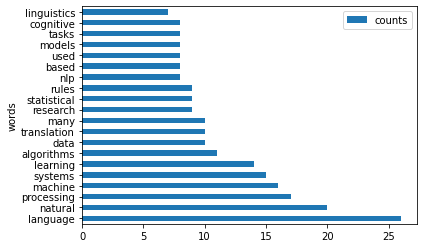

In [11]:
ax = top_ten.plot.barh(x = None, y = 'counts', rot = 0)

### Word Cloud

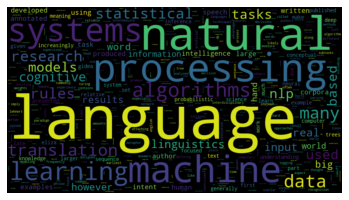

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

worldcloud = WordCloud(width = 900, height = 500, max_words = 1000, relative_scaling = 1, normalize_plurals = False).generate_from_frequencies(word_dict)
plt.imshow(worldcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()
         

## Calculating Sentence vectors

In [13]:
sentence_vectors = []
for i in clean_sentences:
    if len(i) != 0:
        v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
    else:
        v = np.zeros((100,))
    sentence_vectors.append(v)
sentence_vectors[:10]

[array([-0.05880586,  0.48103294,  0.19372508,  0.24858268,  0.19441006,
        -0.3393442 , -0.08197071, -0.19794525,  0.15505171,  0.23716423,
        -0.11620863, -0.32982302,  0.21851452,  0.11183211,  0.10257888,
         0.1052812 ,  0.18322982,  0.32066604, -0.02686061,  0.16734324,
        -0.4074103 , -0.0910756 ,  0.445781  , -0.08939719, -0.2404117 ,
        -0.24199656,  0.13572966, -0.01111674, -0.26508608,  0.15138157,
        -0.20889524,  0.40125787, -0.52294666, -0.21829532,  0.07547541,
        -0.09471338, -0.17238617,  0.2025969 , -0.03953069, -0.18245514,
        -0.36060035, -0.2744668 , -0.463599  , -0.09228086, -0.19683243,
         0.02824319,  0.13326614,  0.05523994, -0.29454947, -0.21889502,
         0.37845844,  0.06691806,  0.21549551,  0.52556026,  0.08722118,
        -1.2180827 ,  0.00381943, -0.30261895,  1.5098081 ,  0.22317624,
        -0.04474987,  0.4552062 , -0.07898569, -0.29001322,  0.67738235,
         0.059335  ,  0.2408833 , -0.08141745,  0.6

## Generate similarity matrix from cosine similarity

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
len(sentences)

58

In [16]:
sim_mat = np.zeros([len(sentences), len(sentences)])
for i in range(len(sentences)):
    for j in range(len(sentences)):
        if i != j:
            sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1, 100), sentence_vectors[j].reshape(1,100))[0,0]
sentences

['Natural language processing (NLP) is a subfield of linguistics, computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.',
 'Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural-language generation.',
 'The history of natural language processing (NLP) generally started in the 1950s, although work can be found from earlier periods.',
 'In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence[clarification needed].',
 'The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English.',
 'The authors claimed that within three or five years, machine translati

In [17]:
sim_mat

array([[0.        , 0.91204017, 0.87334698, ..., 0.82361251, 0.87324317,
        0.7784785 ],
       [0.91204017, 0.        , 0.88689661, ..., 0.82197583, 0.86329356,
        0.77013034],
       [0.87334698, 0.88689661, 0.        , ..., 0.84632605, 0.83071193,
        0.75710618],
       ...,
       [0.82361251, 0.82197583, 0.84632605, ..., 0.        , 0.88143977,
        0.84137541],
       [0.87324317, 0.86329356, 0.83071193, ..., 0.88143977, 0.        ,
        0.90878373],
       [0.7784785 , 0.77013034, 0.75710618, ..., 0.84137541, 0.90878373,
        0.        ]])

## Implementing Pagerank algorithm

In [18]:
import networkx as nx

nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)
scores

{0: 0.017818567599128993,
 1: 0.01750572208144742,
 2: 0.017856962410864586,
 3: 0.016628824213322874,
 4: 0.016384970614760307,
 5: 0.017174310768366265,
 6: 0.01730173894897168,
 7: 0.01752652231575683,
 8: 0.017737968180576647,
 9: 0.01758448094931235,
 10: 0.01676164408443703,
 11: 0.017679571733456044,
 12: 0.007961050070608681,
 13: 0.01628346676220147,
 14: 0.018111244578627134,
 15: 0.01788240202799643,
 16: 0.017069054293587526,
 17: 0.016640679837005404,
 18: 0.018155216764081564,
 19: 0.018446870193260946,
 20: 0.018071103908332206,
 21: 0.018037333791918127,
 22: 0.01798520479921032,
 23: 0.01757120036263792,
 24: 0.01757693404113524,
 25: 0.018109548456699574,
 26: 0.016659685965761943,
 27: 0.016690988552025596,
 28: 0.017816844370277505,
 29: 0.018282749020425218,
 30: 0.01860996133512944,
 31: 0.01816873157366398,
 32: 0.018068499801829136,
 33: 0.018019166251138256,
 34: 0.01792630063575529,
 35: 0.018045986996525366,
 36: 0.018508319033644843,
 37: 0.01789340596253412

In [19]:
ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse = True)

for i in range(2):
    print(ranked_sentences[i][1])

In the 2010s, representation learning and deep neural network-style machine learning methods became widespread in natural language processing, due in part to a flurry of results showing that such techniques[4][5] can achieve state-of-the-art results in many natural language tasks, for example in language modeling,[6] parsing,[7][8] and many others.
The machine-learning paradigm calls instead for using statistical inference to automatically learn such rules through the analysis of large corpora (the plural form of corpus, is a set of documents, possibly with human or computer annotations) of typical real-world examples.


## Extracting summary


In [20]:
summary = ""
for i in range(10):
    summary += re.sub('[[0-9*]+]','', ranked_sentences[i][1])
    summary = re.sub("\\n", "", summary)
    
summary

c:\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Possible nested set at position 1
  This is separate from the ipykernel package so we can avoid doing imports until


'In the 2010s, representation learning and deep neural network-style machine learning methods became widespread in natural language processing, due in part to a flurry of results showing that such techniques can achieve state-of-the-art results in many natural language tasks, for example in language modeling, parsing, and many others.The machine-learning paradigm calls instead for using statistical inference to automatically learn such rules through the analysis of large corpora (the plural form of corpus, is a set of documents, possibly with human or computer annotations) of typical real-world examples.Systems based on machine-learning algorithms have many advantages over hand-produced rules:The following is a list of some of the most commonly researched tasks in natural language processing.However, part-of-speech tagging introduced the use of hidden Markov models to natural language processing, and increasingly, research has focused on statistical models, which make soft, probabilist